## SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. Sounds simple enough, but there’s an infinite amount of lines to choose from. How do we know which line will do the best job of classifying the data? This is where the LSVM algorithm comes in to play. The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.

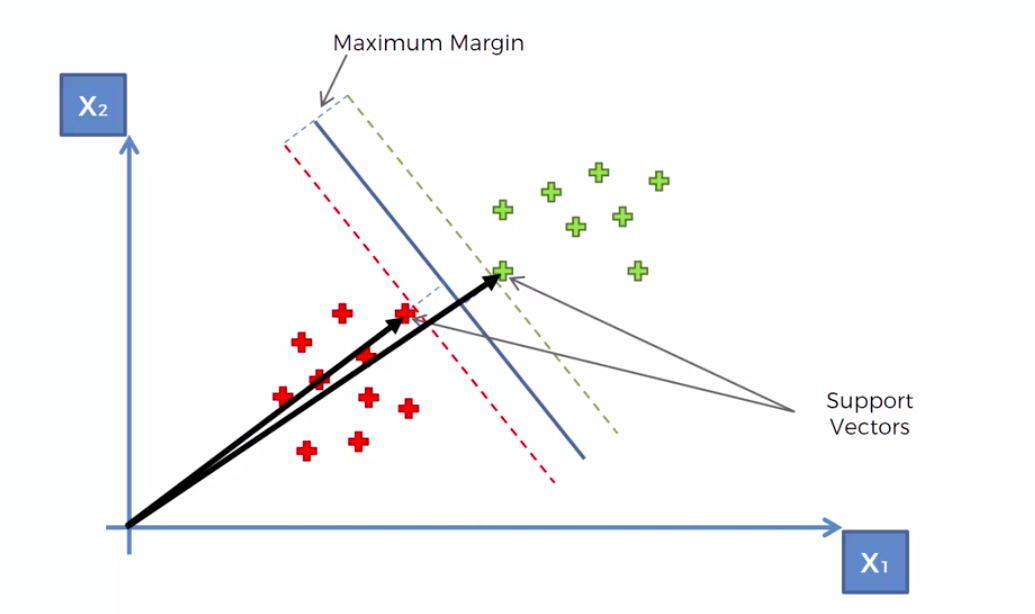


## Linear SVM

We are given a training dataset of $n$ points of the form

$(\vec{x_1}, y_1), (\vec{x_2}, y_2), ..., (\vec{x_n}, y_n)$

where the $y_i$ are either 1 or −1, each indicating the class to which the point $\vec{x_i}$ belongs. Each $\vec{x_i}$ is a $p$-dimensional real vector. We want to find the "maximum-margin hyperplane" that divides the group of points $\vec{x_i}$ for which $y_i = 1$ from the group of points for which $y_i = -1$, which is defined so that the distance between the hyperplane and the nearest point $\vec{x_i}$ from either group is maximized.

Any hyperplane can be written as the set of points $\vec{x_i}$ satisfying

$\vec{w}\cdot \vec{x} - b = 0$

where $\vec{w}$ is the (not necessarily normalized) normal vector to the hyperplane

### Hard-margin

If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations:

$\vec{w}\cdot \vec{x} - b = 1$ (anything on or above this boundary is of one class, with label 1)

and

$\vec{w}\cdot \vec{x} - b = -1$ (anything on or below this boundary is of the other class, with label −1)

Geometrically, the distance between these two hyperplanes is $\frac{2}{\left \| \vec{w} \right \|}$, so to maximize the distance between the planes we want to minimize $\left \| \vec{w} \right \|$. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each $i$ either 

$\vec{w}\cdot \vec{x} - b \geq 1$, if $y_i = 1$

or

$\vec{w}\cdot \vec{x} - b \leq 1$, if $y_i = -1$

These constraints state that each data point must lie on the correct side of the margin.

This can be rewritten as

$y_i(\vec{w}\cdot \vec{x} - b) \geq 1$, for all $1 \leq i \leq n$  $(1)$

We can put this together to get the optimization problem:

"Minimize $\left \| \vec{w} \right \|$ subject to $y_i(\vec{w}\cdot \vec{x} - b) \geq 1$ for $i = 1 , ..., n$"

An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those $\vec{x_i}$ that lie nearest to it. These $\vec{x_i}$ are called support vectors.

### Soft-margin

To extend SVM to cases in which the data are not linearly separable, we introduce the hinge loss function,

$max(0, 1 - y_i(\vec{w} \cdot \vec{x_i} - b)$

Note that $y_i$ is the $i$-th target (i.e., in this case, 1 or −1), and $\vec{w} \cdot \vec{x_i} - b$ is the current output. This function is zero if the constraint in (1) is satisfied, in other words, if $x_i$ lies on the correct side of the margin. For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.

We then wish to minimize

$\left [ \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_i(\vec{w} \cdot \vec{x_i} - b)) \right ] + \lambda \left \| \vec{w} \right \|^2$

where the parameter $\lambda$ determines the trade-off between increasing the margin size and ensuring that the $\vec{x_i}$ lie on the correct side of the margin. Thus, for sufficiently small values of $\lambda$ , the second term in the loss function will become negligible, hence, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def load_data(fname):
    """
    载入数据
    """
    with open(fname) as f:
        data = []
        for i, line in enumerate(f):
            if i == 0: # 跳过第一行数据声明部分
                continue
            tmp = line.strip().split()
            x1 = float(tmp[0])
            x2 = float(tmp[1])
            t = float(tmp[2])
            data.append((x1, x2, t)) # x1, x2, t，t的范围为{-1, 1}
        return np.array(data)

In [50]:
def eval_acc(label, pred):
    """
    计算准确率。
    """
    return np.sum(label == pred) / len(pred)


class SVM():
    """
    SVM模型。
    """

    def __init__(self):
        self.w = np.random.randn(2, 1)
        self.b = np.random.normal()
        
    def train(self, data_train):
        
        cnt = 1 # 训练次数
        X = data_train[:, :2]
        Y = data_train[:, 2]
        
        for i in range(cnt):
            
            delta_w = np.zeros((2, 1))
            delta_b = 0
            
            for j in range(len(X)):
                
                x = np.expand_dims(X[j], axis=1)
                
                svm_out = np.dot(self.w.T, x) + self.b
                
                if svm_out * Y[j] <= 1:
                    
                    delta_w += Y[j] * x
                    delta_b += Y[j]
            
            tmp = len(X)
            delta_w /= tmp
            delta_b /= tmp
            self.w += delta_w
            self.b += delta_b
        
#         print(self.w)
#         print(self.b)
        
    def predict(self, x):
        """
        预测标签。
        """
        svm_out_martrix = np.dot(self.w.T, x.T).T + self.b
        svm_out_martrix = svm_out_martrix.flatten()
        
        svm_out_martrix[svm_out_martrix >= 1] = 1
        svm_out_martrix[svm_out_martrix <= 1] = -1
        
        return svm_out_martrix

In [51]:
if __name__ == '__main__':
    
    train_file = 'data/train_linear.txt'
    test_file = 'data/test_linear.txt'
    data_train = load_data(train_file)  # 数据格式[x1, x2, t]
    data_test = load_data(test_file)
        
    # 使用训练集训练SVM模型
    svm = SVM()  # 初始化模型
    svm.train(data_train)  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = svm.predict(x_train)  # 预测标签
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = svm.predict(x_test)

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))

train accuracy: 50.0%
test accuracy: 50.0%


我好像只看懂了线性的支持向量机，非线性的有点难......

在代码中我使用的$Loss函数是$$\left [ \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_i(\vec{w} \cdot \vec{x_i} + b)) \right ]$，更新$\vec{w}$和$b$的话用的是梯度下降法，但是准确率只有50%，可能因为我写的这个模型太简单了...

In [52]:
x1, y1 = [], []
x2, y2 = [], []

for item in data_train:
    if item[2] == -1:
        x1.append(item[0])
        y1.append(item[1])
    else:
        x2.append(item[0])
        y2.append(item[1])

In [53]:
x1, y1 = np.array(x1), np.array(y1)
x2, y2 = np.array(x2), np.array(y2)

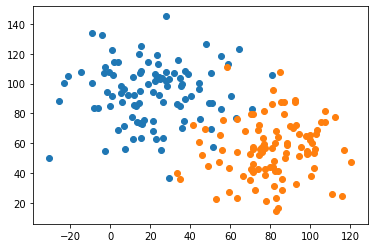

In [54]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)